TODO 

---
-finishing getting the epochs for all datasets seperately
-finish getting the labels for all the epochs
-compile them into one epochs object


#Setting up

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive

[Errno 2] No such file or directory: 'drive'
/content/drive/Shareddrives/blisssinghal-dataset


In [ ]:
%cd Shareddrives/blisssinghal-dataset/

[Errno 2] No such file or directory: 'Shareddrives/blisssinghal-dataset/'
/content/drive/Shareddrives/blisssinghal-dataset


In [ ]:
%pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%pip install pyriemann

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Importing Libraries

In [ ]:
import glob
import numpy as np
import pandas as pd
import mne
import os
import matplotlib.pyplot as plt
import sklearn 
import keras
import pickle
import pickletools
import sklearn.neighbors
import sklearn.metrics

this package is for classification algorithms for eeg data

In [ ]:
import pyriemann
from pyriemann import classification as classify

Importing specific libraries from keras 

In [ ]:
from keras.layers import LSTM, Dense, RNN
from keras.callbacks import ReduceLROnPlateau


#Data Extraction

##Extracting the names of the files from a given folder

In [ ]:
def extract_files(folder):
    file_names = glob.glob(f"Dataset/{folder}/*.edf")
    return file_names

##Extracting the names of files from all folders

In [ ]:
def extract_all_files():
    names = []
    for i in range(24):
        if (i + 1 < 10):
            names.append(extract_files(f"chb0{i+1}"))
        else:
             names.append(extract_files(f"chb{i+1}"))
    return names

In [ ]:
names = extract_all_files()
print(names)

[['Dataset/chb01/chb01_25.edf', 'Dataset/chb01/chb01_13.edf', 'Dataset/chb01/chb01_18.edf', 'Dataset/chb01/chb01_42.edf', 'Dataset/chb01/chb01_36.edf', 'Dataset/chb01/chb01_21.edf', 'Dataset/chb01/chb01_04.edf', 'Dataset/chb01/chb01_39.edf', 'Dataset/chb01/chb01_02.edf', 'Dataset/chb01/chb01_05.edf', 'Dataset/chb01/chb01_43.edf', 'Dataset/chb01/chb01_24.edf', 'Dataset/chb01/chb01_14.edf', 'Dataset/chb01/chb01_33.edf', 'Dataset/chb01/chb01_23.edf', 'Dataset/chb01/chb01_46.edf', 'Dataset/chb01/chb01_26.edf', 'Dataset/chb01/chb01_22.edf', 'Dataset/chb01/chb01_09.edf', 'Dataset/chb01/chb01_32.edf', 'Dataset/chb01/chb01_38.edf', 'Dataset/chb01/chb01_34.edf', 'Dataset/chb01/chb01_27.edf', 'Dataset/chb01/chb01_40.edf', 'Dataset/chb01/chb01_41.edf', 'Dataset/chb01/chb01_12.edf', 'Dataset/chb01/chb01_31.edf', 'Dataset/chb01/chb01_19.edf', 'Dataset/chb01/chb01_10.edf', 'Dataset/chb01/chb01_29.edf', 'Dataset/chb01/chb01_30.edf', 'Dataset/chb01/chb01_17.edf', 'Dataset/chb01/chb01_37.edf', 'Dataset

##Flattening the names array

In [ ]:
def flatten(names):
    new_array = []
    for i in range(len(names)):
        for j in range(len(names[i])):
            new_array.append(names[i][j])
    return new_array

In [ ]:
names = flatten(names)

In [ ]:
#converting names into numpy array
names = np.asarray(names)
print(names.shape)


(619,)


getting the foldername from the file name

In [ ]:
def get_folder_name(file_name):
    folder_name, num = file_name.split("_")
    return folder_name

Seperating the Data into seizure data and non seizure data

##Getting the seizure file names from the records

In [ ]:
def get_record_names(filepath):
    names = pd.read_csv(filepath)
    names = names.values.tolist()
    return names

In [ ]:
seizure_names = get_record_names("Dataset/records_seizures.csv")
print(seizure_names)


[['chb01/chb01_04.edf'], ['chb01/chb01_15.edf'], ['chb01/chb01_16.edf'], ['chb01/chb01_18.edf'], ['chb01/chb01_21.edf'], ['chb01/chb01_26.edf'], ['chb02/chb02_16.edf'], ['chb02/chb02_16+.edf'], ['chb02/chb02_19.edf'], ['chb03/chb03_01.edf'], ['chb03/chb03_02.edf'], ['chb03/chb03_03.edf'], ['chb03/chb03_04.edf'], ['chb03/chb03_34.edf'], ['chb03/chb03_35.edf'], ['chb03/chb03_36.edf'], ['chb04/chb04_05.edf'], ['chb04/chb04_08.edf'], ['chb04/chb04_28.edf'], ['chb05/chb05_06.edf'], ['chb05/chb05_13.edf'], ['chb05/chb05_16.edf'], ['chb05/chb05_17.edf'], ['chb05/chb05_22.edf'], ['chb06/chb06_01.edf'], ['chb06/chb06_04.edf'], ['chb06/chb06_09.edf'], ['chb06/chb06_10.edf'], ['chb06/chb06_13.edf'], ['chb06/chb06_18.edf'], ['chb06/chb06_24.edf'], ['chb07/chb07_12.edf'], ['chb07/chb07_13.edf'], ['chb07/chb07_18.edf'], ['chb08/chb08_02.edf'], ['chb08/chb08_05.edf'], ['chb08/chb08_11.edf'], ['chb08/chb08_13.edf'], ['chb08/chb08_21.edf'], ['chb09/chb09_06.edf'], ['chb09/chb09_08.edf'], ['chb09/chb09_

Formatting the seizure names the same way they are formatted in the data array

In [ ]:
def format_seizure_names(names):
    formated = []
    for array in names:
        for name in array:
            folder, file = name.split("/")
            name2 = f"Dataset/{folder}\\{file}"
            formated.append(name2)
    return formated

In [ ]:
seizure_names = format_seizure_names(seizure_names)
print(seizure_names)

['Dataset/chb01\\chb01_04.edf', 'Dataset/chb01\\chb01_15.edf', 'Dataset/chb01\\chb01_16.edf', 'Dataset/chb01\\chb01_18.edf', 'Dataset/chb01\\chb01_21.edf', 'Dataset/chb01\\chb01_26.edf', 'Dataset/chb02\\chb02_16.edf', 'Dataset/chb02\\chb02_16+.edf', 'Dataset/chb02\\chb02_19.edf', 'Dataset/chb03\\chb03_01.edf', 'Dataset/chb03\\chb03_02.edf', 'Dataset/chb03\\chb03_03.edf', 'Dataset/chb03\\chb03_04.edf', 'Dataset/chb03\\chb03_34.edf', 'Dataset/chb03\\chb03_35.edf', 'Dataset/chb03\\chb03_36.edf', 'Dataset/chb04\\chb04_05.edf', 'Dataset/chb04\\chb04_08.edf', 'Dataset/chb04\\chb04_28.edf', 'Dataset/chb05\\chb05_06.edf', 'Dataset/chb05\\chb05_13.edf', 'Dataset/chb05\\chb05_16.edf', 'Dataset/chb05\\chb05_17.edf', 'Dataset/chb05\\chb05_22.edf', 'Dataset/chb06\\chb06_01.edf', 'Dataset/chb06\\chb06_04.edf', 'Dataset/chb06\\chb06_09.edf', 'Dataset/chb06\\chb06_10.edf', 'Dataset/chb06\\chb06_13.edf', 'Dataset/chb06\\chb06_18.edf', 'Dataset/chb06\\chb06_24.edf', 'Dataset/chb07\\chb07_12.edf', 'Datas

Getting the healthy file names by deleting the file names that are the ones with seizures

In [ ]:
def get_healthy_names(all_names, seizure_names):
    healthy = []
    for folder in all_names:
        for name1 in folder:
            seizure = False
            for name2 in seizure_names:
                if (name1 == name2):
                    seizure = True
            if (not seizure):
                healthy.append(name1)
    return healthy

In [ ]:
healthy_names = get_healthy_names(names, seizure_names)

##going thru the all the summary files to get the start and stop times and files of the seizure

Finding the seizure files in the summary file

In [ ]:
def get_seizure_files_summary(summary, seizure_names):
    files = []
    seizure_files = []
    summary = open(summary, "r")
    for line in summary:
        for word in line.split(" "):
            for w in (word):
                if w == ".":
                    files.append(word)
    for file in files:
        file = "Dataset/chb21\\" + file
        for seizure_name in seizure_names:
            if (file.split(" ")[0] == seizure_name.split()[0]):
                seizure_files.append(file)
    return seizure_files

getting seizure start and end times

In [ ]:
def get_seizure_time(summary, seizure_files):
    start = []
    end = []
    summary = open(summary, "r")
    for line in summary:
        words = line.split(" ")
        if "Seizure" in line and "Start" in line:
            start.append(words[len(words) - 2])
        elif "Seizure" in line and "End" in line:
            end.append(words[len(words) - 2])
    return start, end
    

get summary file in a particular dataset folder, like chb01

In [ ]:
def get_summary_file(data_folder):
    for file in os.listdir(data_folder):
        #checking to see if it has summary
        if len(str(file).split("-")) > 1:
            return file

find the ones that are .edf

In [ ]:
def get_edf_files(files):
    edf_files = []
    for file in files:
        if len(file.split(".")) == 2 and file.split(".")[1] == "edf":
            edf_files.append(file)
    return edf_files

getting the total time of the files that is before the seizure file

In [ ]:
def get_time(file_reading, line_index): 
    line = file_reading[line_index] 
    words = line.split(" ")
    time = words[len(words) - 1]
    return time

##Extracting the data from the files using mne

In [ ]:
def get_data(filename):
    data = mne.io.read_raw_edf(filename, preload = True)
    mne.channels.make_1020_channel_selections(data.info)
    data.set_eeg_reference()
    epochs = mne.make_fixed_length_epochs(data, duration = 5, overlap=1)
  
    return data, epochs

##Ordering the files based on the file start and end time

In [ ]:
#getting the file start times
def get_file_start(summary):
    file_order = {}
    file_end = []
    summary = open(summary, "r")
    lines = summary.readlines()
    for index in range(len(lines)):
        words = (lines[index]).split(" ")
        if "File Name" in lines[index]:
            name = words[2].strip()
        if "File Start" in lines[index]:
            time = words[3].strip()
            file_order.update({time:name})
            #convert time and name back to nothing
            time = ""
            name = ""
        if "File End" in lines[index]:
            end = words[3].strip()
            file_end.append(end)
            
    return file_order, file_end
        

In [ ]:
summary_file = "Dataset/chb23/chb23-summary.txt"

In [ ]:
file_order, file_end = get_file_start(summary_file)

In [ ]:
print(file_end)

['11:02:43', '11:45:56', '14:40:27', '18:41:13', '6:28:28', '7:52:05']


In [ ]:
print(file_order)

{'08:57:57': 'chb23_06.edf', '11:03:16': 'chb23_07.edf', '11:48:05': 'chb23_08.edf', '14:40:47': 'chb23_09.edf', '02:28:28': 'chb23_19.edf', '06:28:36': 'chb23_20.edf'}


extracting the hr val

In [ ]:
def get_hr(time):
    hr, minute, sec = time.split(":")
    hr_int = float(hr) * 3600
    min_float = float(minute) * 60
    sec_float = float(sec)
    final = hr_int + min_float + sec_float
    return final

Sorting the hr times

In [ ]:
def sort_hr(hours):
    return hours.sort()
    

In [ ]:
def sort_by_time(summary):
    file_order, file_end = get_file_start(summary)
    new_file_order = {}
    hours = []
    for time, file in file_order.items():
        hour = get_hr(time)
        hours.append(hour)
        new_file_order.update({hour:file})
    hours2 = sorted(hours)
    sorted_list = {}
    for hour in hours2:
        for time, file in new_file_order.items():
            if hour == time:
                sorted_list.update({hour: file})
    end_times = []
    for val in file_end:
        time = get_hr(val)
        end_times.append(time)
    print(end_times)
    end_times = sorted(end_times)           
    return sorted_list, end_times

In [ ]:
new_file_order, file_end = sort_by_time(summary_file)


[39763.0, 42356.0, 52827.0, 67273.0, 23308.0, 28325.0]


In [ ]:
print(new_file_order)

{8908.0: 'chb23_19.edf', 23316.0: 'chb23_20.edf', 32277.0: 'chb23_06.edf', 39796.0: 'chb23_07.edf', 42485.0: 'chb23_08.edf', 52847.0: 'chb23_09.edf'}


In [ ]:
print(file_end)

[23308.0, 28325.0, 39763.0, 42356.0, 52827.0, 67273.0]


##getting the list of vals from dictionary

In [ ]:
def get_value(dictionary):
    values = []
    for key, value in dictionary.items():
        values.append(value)
    return values

##converting string to int

In [ ]:
def convert_string_to_float(array):
    float_array = []
    for val in array:
        float_array.append(float(val))
    return float_array


##converting list to numpy array

In [ ]:
def array_to_numpy(array):
    return np.asarray(array)

##get key from value

In [ ]:
def get_key(dictionary, val):
    for key, value in dictionary.items():
        if value == val:
            return key

##converting dictionary keys to list

In [ ]:
def keys_to_list(dictionary):
    keys = []
    for key in dictionary.keys():
        keys.append(key)
    return keys

getting the ordered filed names

In [ ]:
ordered_files = get_value(new_file_order)

##formatting the file names

In [ ]:
def format_file_names(ordered_files):
    file_names = []
    for val in ordered_files:
        folder_name = get_folder_name(val)
        file_names.append("Dataset" + "/" + folder_name + "/" + val)
    return file_names


In [ ]:
file_names = format_file_names(ordered_files)

##Getting all the epochs

In [ ]:
def get_epochs(names):
    data = []
    epochs = []
    for name in names:
        file_data, file_epoch = get_data(name)
        data.append(file_data)
        epochs.append(file_epoch)
    return data, epochs

In [ ]:
all_data, all_epochs = get_epochs(file_names)

Extracting EDF parameters from /content/drive/Shareddrives/blisssinghal-dataset/Dataset/chb23/chb23_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


<ipython-input-496-ddf5e8362956>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(filename, preload = True)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Not setting metadata
3599 matching events found
No baseline correction applied
0 projection items activated
Extracting EDF parameters from /content/drive/Shareddrives/blisssinghal-dataset/Dataset/chb23/chb23_20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1282303  =      0.000 ...  5008.996 secs...


<ipython-input-496-ddf5e8362956>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(filename, preload = True)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Not setting metadata
1252 matching events found
No baseline correction applied
0 projection items activated
Extracting EDF parameters from /content/drive/Shareddrives/blisssinghal-dataset/Dataset/chb23/chb23_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1916415  =      0.000 ...  7485.996 secs...


<ipython-input-496-ddf5e8362956>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(filename, preload = True)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Not setting metadata
1871 matching events found
No baseline correction applied
0 projection items activated
Extracting EDF parameters from /content/drive/Shareddrives/blisssinghal-dataset/Dataset/chb23/chb23_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 655359  =      0.000 ...  2559.996 secs...


<ipython-input-496-ddf5e8362956>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(filename, preload = True)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Not setting metadata
639 matching events found
No baseline correction applied
0 projection items activated
Extracting EDF parameters from /content/drive/Shareddrives/blisssinghal-dataset/Dataset/chb23/chb23_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2647551  =      0.000 ... 10341.996 secs...


<ipython-input-496-ddf5e8362956>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(filename, preload = True)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Not setting metadata
2585 matching events found
No baseline correction applied
0 projection items activated
Extracting EDF parameters from /content/drive/Shareddrives/blisssinghal-dataset/Dataset/chb23/chb23_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3693055  =      0.000 ... 14425.996 secs...


<ipython-input-496-ddf5e8362956>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(filename, preload = True)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Not setting metadata
3606 matching events found
No baseline correction applied
0 projection items activated


renaming t8-p8-0 to t8-p8

##the previous method returns a list of epochs, so combining them into one epochs object

In [ ]:
all_epochs = mne.concatenate_epochs(all_epochs)

Using data from preloaded Raw for 3599 events and 1280 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1252 events and 1280 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1871 events and 1280 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 639 events and 1280 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 2585 events and 1280 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 3606 events and 1280 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 3599 events and 1280 original time points ...
Using data from preloaded Raw for 1252 events and 1280 original time points ...
Using data from preloaded Raw for 1871 events and 1280 original time points ...
Using data from preloaded Raw for 639 events and 1280 original time points ...
Using data from preloaded Raw for 2585 events and 1280 original time points 

##Saving the epochs into a file using pickle

In [ ]:
def save_epochs(epochs, file):
    with open(file, 'wb') as file: 
        pickle.dump(epochs, file)

##Function to load the epochs again

In [ ]:
def load_epochs(file):
    with open(file, 'rb') as file:
        epochs = pickle.load(file)
    return epochs

In [ ]:
print(all_epochs.info)

<Info | 8 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 EEG
 custom_ref_applied: True
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2053-10-25 02:28:28 UTC
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
>


In [ ]:
def make_topography_images(epochs, pos):
    mne.viz.plot_topomap(epochs, pos)

##Making EEG montage

In [ ]:
montage =  mne.channels.make_standard_montage('standard_1020')

Renaming Channel

In [ ]:
all_epochs.info["ch_names"]

['FP1-F7',
 'F7-T7',
 'T7-P7',
 'P7-O1',
 'FP1-F3',
 'F3-C3',
 'C3-P3',
 'P3-O1',
 'FP2-F4',
 'F4-C4',
 'C4-P4',
 'P4-O2',
 'FP2-F8',
 'F8-T8',
 'T8-P8-0',
 'P8-O2',
 'FZ-CZ',
 'CZ-PZ',
 'P7-T7',
 'T7-FT9',
 'FT9-FT10',
 'FT10-T8',
 'T8-P8-1']

In [ ]:
new_channels = ['FP1', 'F7', 'T7', 'P7', 'F3', 'C3', 'P3', 'O1', 'FP2', 'F4', 'C4', 'P4', 'F8', 'T8', 'PO8', 'O2', 'FZ', 'CZ', 'FT9', 'FT10']

In [ ]:
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'T7-FT9', 'FT9-FT10']


In [ ]:
#channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8', 'P8-O2', 'FZ-CZ', 'CZ-PZ']

In [ ]:
#new_channels = ['FP1', 'F7', 'T7', 'P7', 'F3', 'C3', 'P3', 'O1', 'FP2', 'F4', 'C4', 'P4', 'F8', 'T8', 'PO8', 'O2', 'FZ', 'CZ']

In [ ]:
len(channels)
len(new_channels)

20

In [ ]:
mapping = {}
for i in range(len(channels)):
    mapping.update({channels[i]: new_channels[i]})

In [ ]:
mne.rename_channels(all_epochs.info, mapping)

In [ ]:
all_epochs.info["ch_names"]

['FP1',
 'F7',
 'T7',
 'P7',
 'F3',
 'C3',
 'P3',
 'O1',
 'FP2',
 'F4',
 'C4',
 'P4',
 'F8',
 'T8',
 'PO8',
 'O2',
 'FZ',
 'CZ',
 'P7-T7',
 'FT9',
 'FT10',
 'FT10-T8',
 'T8-P8-1']

Dropping channels bc they do not fit into the montage generated by mne
data.drop_channels(['FP1', 'FP2', 'FZ', 'CZ', 'FT10-T8', 'T8-P8-1', 'P7-T7', '.-0', '.-1', '.-2', '.-3', '.-4'])

In [ ]:
all_epochs.drop_channels(['FP1', 'FP2', 'FZ', 'CZ', 'FT10-T8', 'T8-P8-1', 'P7-T7'])

<EpochsArray |  13552 events (all good), 0 - 4.99609 sec, baseline off, ~2.07 GB, data loaded,
 '1': 13552>

In [ ]:
#all_epochs.drop_channels(['PZ-OZ', '--5', 'FC1-Ref', 'FC2-Ref', 'FC5-Ref', 'FC6-Ref', 'CP1-Ref', 'CP2-Ref', 'CP5-Ref', 'CP6-Ref'])

In [ ]:
all_epochs.info

<Info | 8 non-empty values
 bads: []
 ch_names: F7, T7, P7, F3, C3, P3, O1, F4, C4, P4, F8, T8, PO8, O2, FT9, FT10
 chs: 16 EEG
 custom_ref_applied: True
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2053-10-25 02:28:28 UTC
 nchan: 16
 projs: []
 sfreq: 256.0 Hz
>

In [ ]:
all_epochs.set_montage(montage)

<EpochsArray |  13552 events (all good), 0 - 4.99609 sec, baseline off, ~2.07 GB, data loaded,
 '1': 13552>

In [ ]:
all_epochs= all_epochs.load_data()


In [ ]:
#save_epochs(all_epochs, "chb01_epochs_before_band.pkl")

Deleting any epochs that come after the last seizure

In [ ]:
def delete_extra_epochs(epochs, labels):
  seizure_index = 0
  for index in range(len(labels)):
    if labels[index] == 1:
      seizure_index = index
  epochs = epochs[:(seizure_index + 1)]
  labels = labels[:(seizure_index  + 1)]
  return epochs, labels

#Signal Decomposition

##Band filtering the data
recommended to have frequency of above 1 when working with ICA and a frequency not above 50

In [ ]:
def band_filter(epochs, low, high):
    epochs.filter(low, high)
    return epochs

In [ ]:
epochs = band_filter(all_epochs, 1, 50)

Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 216832 out of 216832 | elapsed:  1.2min finished


In [ ]:
save_epochs(epochs, "epoch_files/chb023.pkl")

##Loading the epochs after band filtering

In [ ]:
def load_all_epochs(epoch_folder):
  epochs = []
  for i in range(23):
    if i == 12 or i == 17:
      continue
    file = "chb0" + i + ".pkl"
    file_epochs = load_epochs(f"{epoch_folder}/{file}")
    epochs.append(file_epochs)
  #concatenating all the epochs
  epochs = mne.concatenate_epochs(epochs)
  return epochs

##Loading all the epoch labels

In [ ]:
def get_all_epoch_labels(label_folder):
  labels = []
  for i in range(23):
    file = "chb0" + i + "_labels.pkl"
    file_labels = load_epochs(f"{label_folder}/{file}")
    labels.append(file_labels)
    #flattening the labels array
    labels = flatten(labels)
    return labels


Will first combine the epochs for all the datasets, then proceed

##ICA on epochs

In [ ]:
def ica_on_epochs(epochs):
    ica = mne.preprocessing.ICA(n_components = 10, random_state = 97, max_iter = 800)
    ica.fit(epochs)
    epochs = ica.apply(epochs)
    ica.plot_properties(epochs)
    return epochs

Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 343.8s.
Applying ICA to Epochs instance
    Transforming to ICA space (10 components)
    Zeroing out 0 ICA components
    Projecting back using 16 PCA components
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
18652 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
18652 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
18652 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
18652 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
18652 matching events found
No baseline correction applied
0 projection items activated


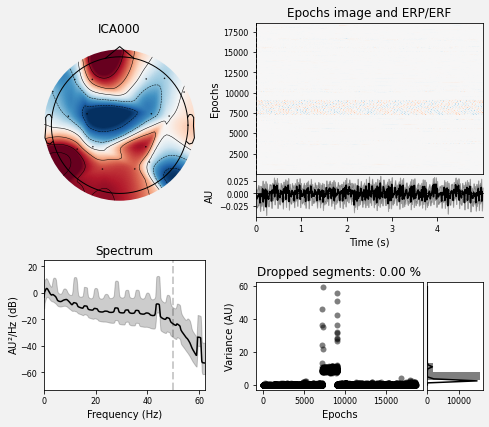

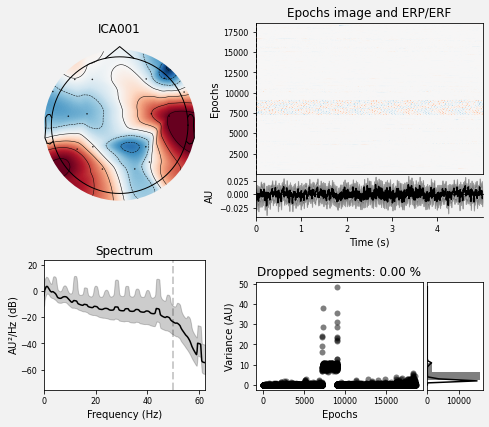

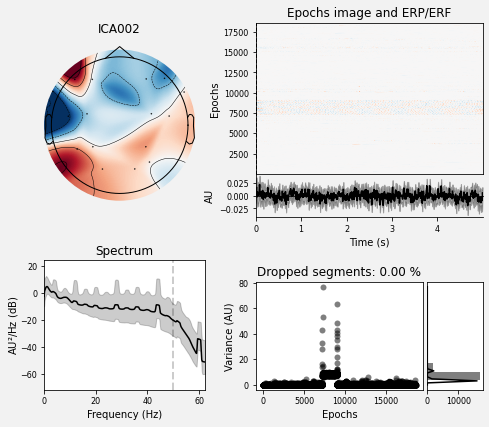

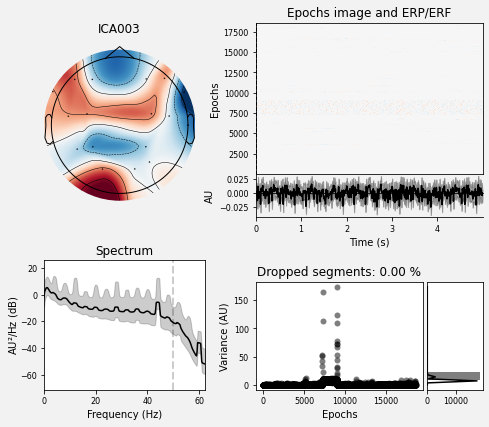

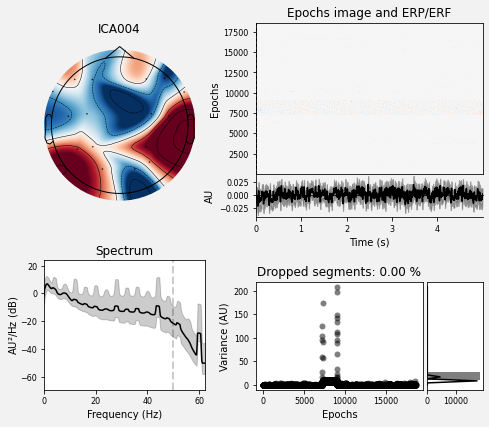

In [ ]:
epochs = ica_on_epochs(epochs)

Converting epochs into a numpy array

##gettting the noise covariance

In [ ]:
def get_noise_covariance(epochs):
    noise_covariance = mne.compute_covariance(epochs)
    noise_covariance.plot(epochs.info)

In [ ]:
noise_covariance = mne.compute_covariance(epochs)

Computing rank from data with rank=None
    Using tolerance 3.1e-09 (2.2e-16 eps * 16 dim * 8.8e+05  max singular value)
    Estimated rank (eeg): 16
    EEG: rank 16 computed from 16 data channels with 0 projectors
Reducing data rank from 16 -> 16
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 23874560
[done]


Computing rank from covariance with rank=None
    Using tolerance 1.2e-12 (2.2e-16 eps * 16 dim * 3.3e+02  max singular value)
    Estimated rank (eeg): 16
    EEG: rank 16 computed from 16 data channels with 0 projectors


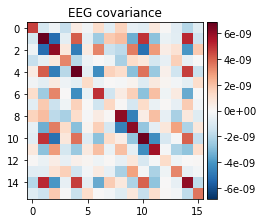

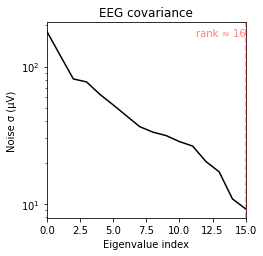

(<Figure size 273.6x266.4 with 2 Axes>, <Figure size 273.6x266.4 with 1 Axes>)

In [ ]:
noise_covariance.plot(epochs.info)

In [ ]:
get_noise_covariance(epochs)

MemoryError: Unable to allocate 4.47 GiB for an array with shape (16, 29264, 1280) and data type float64

##Making projections using the SSP algorithm

The projections are the principal components of the given data

In [ ]:
projections = mne.compute_proj_epochs(epochs)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


No gradiometers found. Forcing n_grad to 0
No magnetometers found. Forcing n_mag to 0
Adding projection: eeg-1-0.000-4.996-PCA-01
Adding projection: eeg-1-0.000-4.996-PCA-02


[Parallel(n_jobs=1)]: Done 18652 out of 18652 | elapsed:    1.6s finished


adding the projections to the epochs object

In [ ]:
epochs.add_proj(projections)

2 projection items deactivated


<EpochsArray |  18652 events (all good), 0 - 4.99609 sec, baseline off, ~2.85 GB, data loaded,
 '1': 18652>

plotting the projections

    Created an SSP operator (subspace dimension = 2)
Computing rank from covariance with rank=None
    Using tolerance 2.3e-13 (2.2e-16 eps * 16 dim * 66  max singular value)
    Estimated rank (eeg): 14
    EEG: rank 14 computed from 16 data channels with 0 projectors


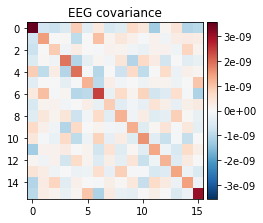

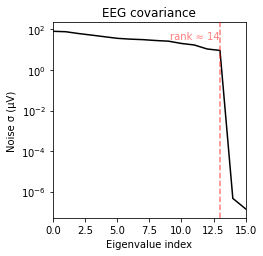

(<Figure size 273.6x266.4 with 2 Axes>, <Figure size 273.6x266.4 with 1 Axes>)

In [ ]:
noise_covariance.plot(epochs.info, proj = True)

plot epochs image, shows ERP

Not setting metadata
18652 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


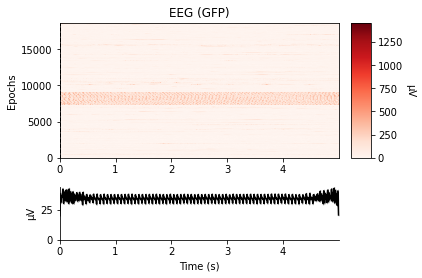

[<Figure size 432x288 with 3 Axes>]

In [ ]:
epochs.plot_image()

Plotting the sensor locations

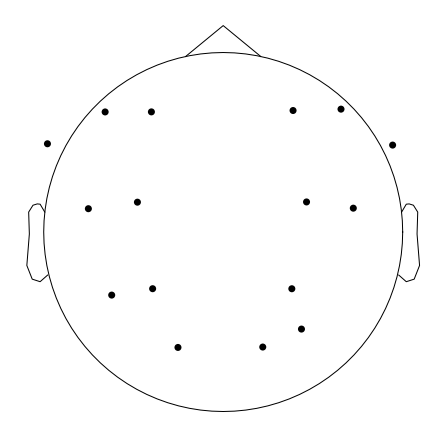

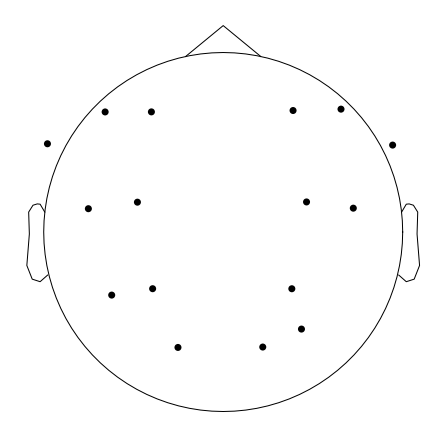

In [ ]:
epochs.plot_sensors()

# Having labels for EVERY epoch telling if it includes seizure or not 

Method: find the duration of seizure, find the duration of time before seizure, and divide by 5 to know how many EPOCHS are before the seizure, how many epochs are within seizure

Seizure start and end time need to be in context of the total time in the dataset, not just in the particular file

Problem: can only label this PER dataset

getting the total time from the dictionary of times by subtracting the last one from the first

In [ ]:
def get_total_time(file_order):
    #getting the keys
    times = file_order.keys()
    total = times[len(times) - 1] - times[0]
    return total

getting the seizure file times 

In [ ]:
def get_seizure_files(names, seizure_names):
    files = []
    for name in names: 
        for seizure_name in seizure_names:
            fill, seizure_name = seizure_name.split("/")
            seizure_name = "Dataset\\"  + seizure_name
            if name == seizure_name: 
                beg, mid, end = name.split("\\")
                files.append(end)
    return files
            

In [ ]:
seizure_files = get_seizure_files(file_names, seizure_names)

Getting seizure file start and end times

In [ ]:
start, end = get_seizure_time(summary_file, seizure_files)

yay
yay3
yay
yay3
yay
yay3
yay
yay3
yay
yay3
yay
yay3
yay
yay3
yay
yay3


the start and end values in the arrays were strings, so just converting them into floats

In [ ]:
start = convert_string_to_float(start)

In [ ]:
end = convert_string_to_float(end)

getting the seizure file start and end times

In [ ]:
def get_seizure_file_times(file_start, end, seizure_files, folder_name):
    seizure_start = []
    seizure_end = []
    names = get_value(file_start)
    for index in range(len(file_start)):
        name = names[index]
        for seizure_name in seizure_files:
            if seizure_name == name:
                seizure_start.append(get_key(file_start, name))
                seizure_end.append(end[index])
    return seizure_start, seizure_end

In [ ]:
seizure_file_start, seizure_file_end = get_seizure_file_times(new_file_order, file_end, seizure_files, "chb20")

formatting the seizure start and end time

In [ ]:
def format_seizure_time(seizure_start, seizure_end, seizure_file_start, seizure_file_end):
    seizure_start_time = seizure_file_start + seizure_start
    seizure_end_time = seizure_file_end + seizure_end
    return seizure_start_time, seizure_end_time

In [ ]:
def format_seizure_times(seizure_start, seizure_end, seizure_file_start, seizure_file_end):
    seizure_start_times = []
    seizure_end_times = []
    for index in range(len(seizure_start)):
        seizure_start_time, seizure_end_time = format_seizure_time(seizure_start[index], seizure_end[index], seizure_file_start[index], seizure_file_end[index])
        seizure_start_times.append(seizure_start_time)
        seizure_end_times.append(seizure_end_time) 
    return seizure_start_times, seizure_end_times

Doing this because two of the seizure files have 2 seizures within them, so I have to dupicate those seizure file start and end times

In [ ]:
seizure_file_start.insert(2, 17820)
seizure_file_end.insert(2, seizure_file_end[1])
seizure_file_start.insert(5, seizure_file_start[4])
seizure_file_end.insert(5, seizure_file_end[4])

In [ ]:
seizure_start_times, seizure_end_times = format_seizure_times(start, end, seizure_file_start, seizure_file_end)

Functions to get the labels of epochs based on the seizure start time and seizure end time

In [ ]:
def get_label(time_count, seizure_starts, seizure_ends):
    label = 0
    for index in range(len(seizure_starts)):
        if (time_count >= seizure_starts[index] and time_count <= seizure_ends[index]):
            label = 1
    return label

In [ ]:
def get_epoch_labels(epochs, seizure_start_time, seizure_end_time):
    #seizure time occurs in the total file time
    labels = []
    time_count = 0
    for epoch in epochs:
        labels.append(get_label(time_count, seizure_start_times, seizure_end_times))
        time_count += 5
    return labels

##To do: make one function that executes all the functions needed to make the epoch labels

In [ ]:
epochs_labels = get_epoch_labels(chb020_epochs_array, seizure_start_times, seizure_end_times)

In [ ]:
epochs_labels = array_to_numpy(epochs_labels)

In [ ]:
save_epochs(epochs_labels, "chb020_labels.pkl")

###Function to transfer labels to where they would be sometime earlier

In [ ]:
def transfer_labels(time, epoch_labels, padding_time = 0):
  shift_epochs = int(time / 5)
  padd_epochs = int(padding_time / 5)
  for index in range(len(epoch_labels)):
    if epoch_labels[index] == 1:
      epoch_labels[index - shift_epochs] = 1
      epoch_labels[index] = 0
  for index in range(len(epoch_labels)):
    if epoch_labels[index] == 1:
      #padding before
      epoch_count = 0
      while epoch_count < padd_epochs:
        epochs_labels[index - epoch_count] = 1
        epochs_labels[index + epoch_count]
      while epoch_labels[index] == 1:
        continue
   #padding time is to include sometime before/after the labels that are exactly "time"before the seizure, since seiuzres do not go for very long
  return epoch_labels

##Checking to see if there is a 1 indicating seizure in the labels

In [ ]:
def check_for_seizure(labels):
    for label in labels: 
        if label == 1:
            return True
    return False

##Using SPoC

In [ ]:
def spoc(epochs_array, epochs_labels, num_comp):
    spoc = mne.decoding.SPoC(num_comp)
    spoc_epochs = spoc.fit_transform(epochs_array, epochs_labels)
    return spoc_epochs

In [ ]:
spoc_epochs = spoc(epochs_array, epochs_labels, 10)

Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 16 dim * 3.5e+09  max singular value)
    Estimated rank (mag): 16
    MAG: rank 16 computed from 16 data channels with 0 projectors
Reducing data rank from 16 -> 16
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-05 (2.2e-16 eps * 16 dim * 3.9e+09  max singular value)
    Estimated rank (mag): 16
    MAG: rank 16 computed from 16 data channels with 0 projectors
Reducing data rank from 16 -> 16
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 16 dim * 4.2e+09  max singular value)
    Estimated rank (mag): 16
    MAG: rank 16 computed from 16 data channels with 0 projectors
Reducing data rank from 16 -> 16
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.3e-05 (2.2e-16 eps * 16 dim * 3.6e+09  max singular value)


In [ ]:
def make_graph(epochs):
    #getting the three channels 
  
    epochs.plot(scalings = "auto")
    

Using matplotlib as 2D backend.


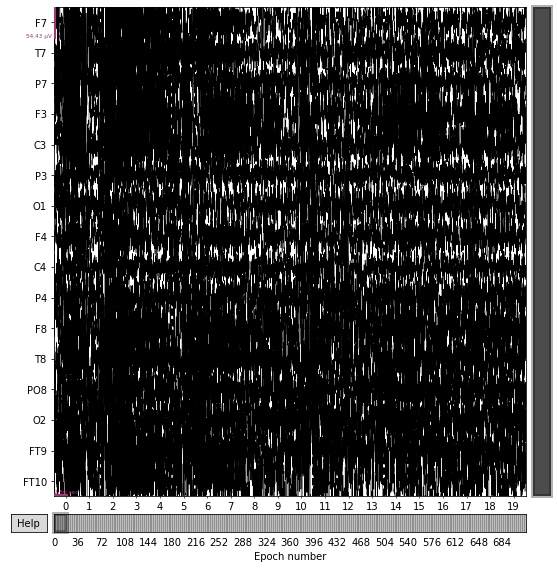

In [ ]:
make_graph(epochs)

Working with epochs

Plotting epochs

    Using multitaper spectrum estimation with 7 DPSS windows


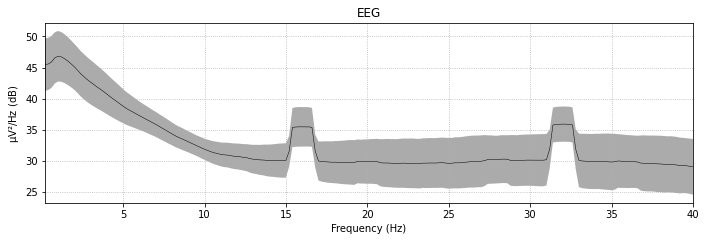

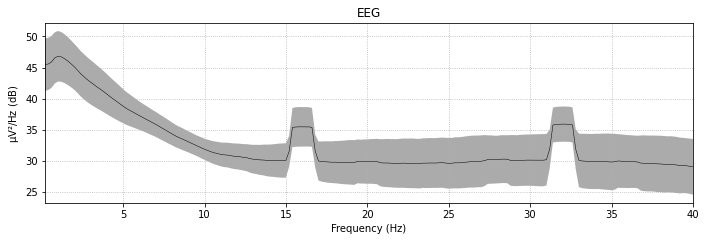

In [ ]:
epochs.plot_psd(fmin=0.2, fmax = 40., average=True)

Epochs topomap

In [ ]:
epochs.plot_psd_topomap()

MemoryError: Unable to allocate 4.47 GiB for an array with shape (1280, 29264, 16) and data type float64

##Most algorithms want only a 2d array, so reshaping epochs to be a two dim array

In [ ]:
def make_2d(array):
    dim1, dim2, dim3 = array.shape
    array = np.reshape(array, (dim1, dim2 * dim3))
    return array

In [ ]:
chb020_2d_array = make_2d(chb020_epochs_array)

In [ ]:
chb021_2d_array = make_2d(chb021_epochs_array)

Classification Algorithms

#1 K-Nearest Neighbors

In [ ]:
def knn(epochs, labels, num_neighbors, lim):
    model = classify.KNearestNeighbor(num_neighbors)
    model.fit(epochs[:lim], labels[:lim])
    preds = model.predict_proba(epochs[lim:])
    return preds



Sklearn KNN

In [ ]:
def sklearn_knn(x_train, y_train, x_test, y_test, num_neighbors):
    model = sklearn.neighbors.KNeighborsClassifier(num_neighbors)
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)
    accuracy = sklearn.metrics.accuracy_score(y_test, y_preds)
    return accuracy

In [ ]:
score = sklearn_knn(chb021_2d_array[:16000], chb021_labels[:16000], chb020_2d_array[:16000], chb020_labels[:16000], 2000)

In [ ]:
print(score)

In [ ]:
print(check_for_seizure(chb020_labels[:16000]))

True


#Making a LSTM model

In [ ]:
 def lstm(x_train, y_train, x_test, y_test):
  dim1, dim2, dim3 = x_train.shape
  model = keras.Sequential()
  model.add(LSTM(32, activation = "tanh", input = (dim2, dim3)))
  model.add(LSTM(16, activation = 'tanh'))
  #model.add(Dense(22, activation = 'relu'))
  model.add(Dense(1, activation = 'sigmoid')) # change activation to sigmoid to keep values close to either 0 or 1 for binary classification
  model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = [keras.metrics.BinaryAccuracy(), keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.FalsePositives(), keras.metrics.FalseNegatives()]) # change loss function to BCE loss (binary crossentropy loss) to match with sigmoid
  #fitting model to training data and validating with test data
  model.fit(x_train, y_train, validation_data = (x_test, y_test))